In [32]:
import pandas as pd

dr = pd.date_range('1-1-2017',periods=4,freq='w')
df = pd.DataFrame({ 'i':range(3), 'x':[1.1,2.2,3.3], 
                        'ts':dr[:3], 'td':dr[1:]-dr[:3] })

df

,i,x,ts,td
0,0,1.1,2017-01-01,7 days
1,1,2.2,2017-01-08,7 days
2,2,3.3,2017-01-15,7 days


In [14]:
df.to_csv('~/data/time1.csv',index=False)
df_original = df

In [15]:
!head ~/data/time1.csv

i,x,ts,td
0,1.1,2017-01-01,1 days
1,2.2,2017-01-02,1 days
2,3.3,2017-01-03,1 days


In [26]:
# df = read_csv('~/data/time1.csv')#
df = pd.read_csv('~/data/time1.csv',infer_datetime_format=True)
df

,i,x,ts,td
0,0,1.1,2017-01-01,1 days
1,1,2.2,2017-01-02,1 days
2,2,3.3,2017-01-03,1 days


In [27]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   i       3 non-null      int64          
 1   x       3 non-null      float64        
 2   ts      3 non-null      datetime64[ns] 
 3   td      3 non-null      timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), timedelta64[ns](1)
memory usage: 224.0 bytes


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   i       3 non-null      int64  
 1   x       3 non-null      float64
 2   ts      3 non-null      object 
 3   td      3 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 224.0+ bytes


In [29]:
df.convert_dtypes().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   i       3 non-null      Int64  
 1   x       3 non-null      Float64
 2   ts      3 non-null      string 
 3   td      3 non-null      string 
dtypes: Float64(1), Int64(1), string(2)
memory usage: 230.0 bytes


In [22]:
import pandas as pd
def dt_inplace(df):
    """Automatically detect and convert (in place!) each
    dataframe column of datatype 'object' to a datetime just
    when ALL of its non-NaN values can be successfully parsed
    by pd.to_datetime().  Also returns a ref. to df for
    convenient use in an expression.
    """
    from pandas.errors import ParserError
    for c in df.columns[df.dtypes=='object']: #don't cnvt num
        try:
            df[c]=pd.to_datetime(df[c])
        except (ParserError,ValueError): #Can't cnvrt some
            pass # ...so leave whole column as-is unconverted
    return df
def read_csv(*args, **kwargs):
    """Drop-in replacement for Pandas pd.read_csv. It invokes
    pd.read_csv() (passing its arguments) and then auto-
    matically detects and converts each column whose datatype
    is 'object' to a datetime just when ALL of the column's
    non-NaN values can be successfully parsed by
    pd.to_datetime(), and returns the resulting dataframe.
    """
    return dt_inplace(pd.read_csv(*args, **kwargs))


In [17]:
for v in df.columns:  
        print( '\ncolumn ' + v + ': ')
        print( 'dtype.str: ', df[v].dtype.str )
        print( 'dtype:     ', df[v].dtype )
        print( 'timestamp? ', df[v].dtype.str[1] == 'M' )
        print(f'is datetime: {pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[v])}')


column i: 
dtype.str:  <i8
dtype:      int64
timestamp?  False
is datetime: False

column x: 
dtype.str:  <f8
dtype:      float64
timestamp?  False
is datetime: False

column ts: 
dtype.str:  |O
dtype:      object
timestamp?  False
is datetime: False

column td: 
dtype.str:  |O
dtype:      object
timestamp?  False
is datetime: False


In [34]:
find_datetime_col(df)

'ts'

In [51]:
import plotly.express as px

df = px.data.stocks()
df

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


In [52]:
df.describe()

,GOOG,AAPL,AMZN,FB,NFLX,MSFT
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,1.046206,1.138536,1.393822,0.945121,1.540559,1.318059
std,0.077776,0.182109,0.140796,0.103350,0.200508,0.220662
min,0.888689,0.847200,1.000000,0.668718,1.000000,0.988547
25%,0.992924,1.000400,1.304091,0.879529,1.398876,1.142873
50%,1.036372,1.095429,1.420278,0.959968,1.560884,1.242431
75%,1.095189,1.236000,1.491702,1.016858,1.701605,1.543599
max,1.226504,1.678000,1.637494,1.123575,1.957665,1.802472


In [63]:
df['amzn_14'] = df.AMZN>1.4

In [76]:
import pandas as pd
df['year'] = pd.DatetimeIndex(df.date).year
df['month'] = pd.DatetimeIndex(df.date).month
df['monthX'] = df.apply(lambda x:f'month_{x.year}_{x.month}',axis=1)
df


,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT,year_2018,amzn_14,month,year,monthX
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,False,1,2018,month_2018_1
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988,True,False,1,2018,month_2018_1
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524,True,False,1,2018,month_2018_1
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561,True,False,1,2018,month_2018_1
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708,True,False,1,2018,month_2018_1
...,...,...,...,...,...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717,False,True,12,2019,month_2019_12
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239,False,True,12,2019,month_2019_12
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896,False,True,12,2019,month_2019_12
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472,False,True,12,2019,month_2019_12


In [75]:
df['date']

0      2018-01-01
1      2018-01-08
2      2018-01-15
3      2018-01-22
4      2018-01-29
          ...    
100    2019-12-02
101    2019-12-09
102    2019-12-16
103    2019-12-23
104    2019-12-30
Name: date, Length: 105, dtype: object

In [77]:
df.to_csv('~/data/stocks1.csv',index=False)

In [78]:
[sym for symbol in ['circle','square','hexagram','star', 'diamond', 'hourglass', 'bowtie'] for sym in [symbol,f'{symbol}-open']]

['circle',
 'circle-open',
 'square',
 'square-open',
 'hexagram',
 'hexagram-open',
 'star',
 'star-open',
 'diamond',
 'diamond-open',
 'hourglass',
 'hourglass-open',
 'bowtie',
 'bowtie-open']

In [62]:
graph = px.line(df, x='date', y=['GOOG','AAPL'], symbol='year_2018')
graph.show()


In [24]:
import plotly.express as px

df = px.data.gapminder().query("continent=='Oceania'")

df['pop_std'] = (df['pop']-df['pop'].mean())/df['pop'].std()
df['lifeExp_std'] = (df['lifeExp']-df['lifeExp'].mean())/df['lifeExp'].std()

fig = px.line(df, x="year", y=['pop_std',"lifeExp_std"],symbol=None)
fig.show()


In [38]:
type({1:2}) is dict

True

In [47]:
def find_element_in_props_tree(props_tree,id_type):
    if type(props_tree) is dict and 'id' in props_tree and \
        type(props_tree['id']) is dict and 'type' in props_tree['id']:
        return props_tree
    if type(props_tree) is dict:
        for el in props_tree.values():
            res = find_element_in_props_tree(el,id_type)
            if res:
                return res
    if type(props_tree) is list:
        for el in props_tree:
            res = find_element_in_props_tree(el,id_type)
            if res:
                return res
    return None
            

In [49]:
xx  =[[{'props': {'children': [{'props': {'children': [{'props': {'children': 'y:'}, 'type': 'Label', 'namespace': 'dash_bootstrap_components'}, {'props': {'options': ['GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], 'value': [], 'id': {'type': 'yaxis-data-time', 'index': 'd2041d6b-d085-4dda-afe3-a2cb8931e66c'}}, 'type': 'Checklist', 'namespace': 'dash_core_components'}], 'width': 2}, 'type': 'Col', 'namespace': 'dash_bootstrap_components'}, {'props': {'children': {'props': {'children': None, 'id': {'type': 'output-div-time', 'index': 'd2041d6b-d085-4dda-afe3-a2cb8931e66c'}}, 'type': 'Div', 'namespace': 'dash_html_components'}}, 'type': 'Col', 'namespace': 'dash_bootstrap_components'}, {'props': {'children': [{'props': {'children': 'symbol:'}, 'type': 'Label', 'namespace': 'dash_bootstrap_components'}, {'props': {'children': {'props': {'options': [], 'value': [], 'id': {'type': 'symbol-data-time', 'index': 'd2041d6b-d085-4dda-afe3-a2cb8931e66c'}}, 'type': 'Checklist', 'namespace': 'dash_core_components'}}, 'type': 'Row', 'namespace': 'dash_bootstrap_components'}], 'width': 2}, 'type': 'Col', 'namespace': 'dash_bootstrap_components'}], 'align': 'center'}, 'type': 'Row', 'namespace': 'dash_bootstrap_components'}, {'props': {'children': [{'props': {'children': {'props': {'children': None, 'id': {'type': 'remove-plot', 'index': 'd2041d6b-d085-4dda-afe3-a2cb8931e66c'}, 'className': 'bi bi-trash3 rounded-circle', 'color': 'primary', 'n_clicks': 0, 'outline': True}, 'type': 'Button', 'namespace': 'dash_bootstrap_components'}, 'width': 1}, 'type': 'Col', 'namespace': 'dash_bootstrap_components'}], 'align': 'right'}, 'type': 'Row', 'namespace': 'dash_bootstrap_components'}, {'props': {'children': None}, 'type': 'Hr', 'namespace': 'dash_html_components'}, {'props': {'id': {'type': 'plot_info', 'index': 'd2041d6b-d085-4dda-afe3-a2cb8931e66c'}, 'data': 'plot', 'modified_timestamp': 1681387860176}, 'type': 'Store', 'namespace': 'dash_core_components'}]]

element = find_element_in_props_tree(xx,'yaxis-data-time')



Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 11 seconds.


TypeError: sample_posterior_predictive() got an unexpected keyword argument 'vars'

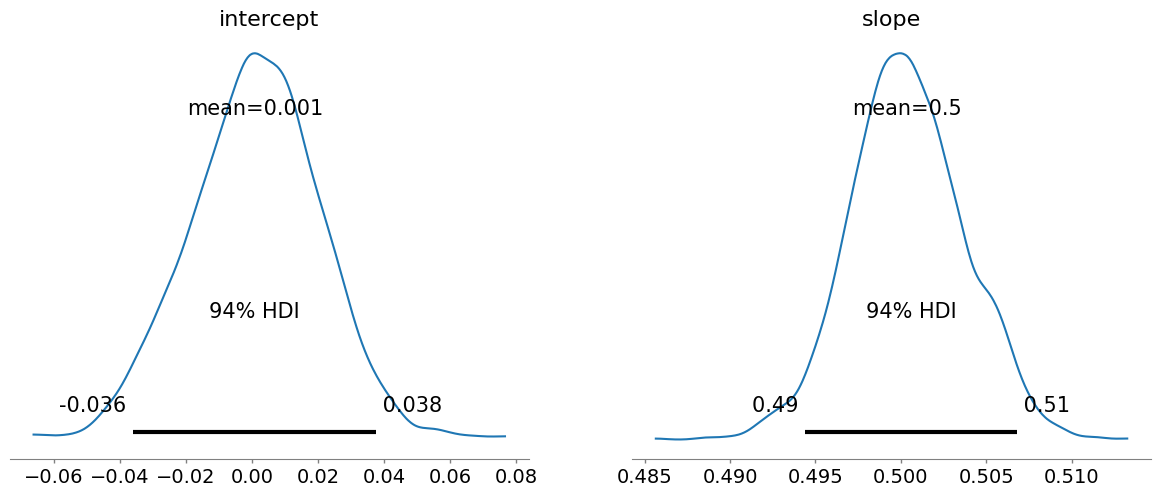

In [80]:
import numpy as np
import pymc as pm

# generate synthetic data with a linear trend
np.random.seed(123)
n = 100
x = np.linspace(0, 10, n)
trend = 0.5 * x
noise = np.random.normal(loc=0, scale=0.1, size=n)
y = trend + noise

# define PyMC3 model
with pm.Model() as model:
    # priors for intercept and slope
    intercept = pm.Normal('intercept', mu=0, sigma=1)
    slope = pm.Normal('slope', mu=0, sigma=1)
    
    # expected value of y
    mu = intercept + slope * x
    
    # likelihood of the data
    likelihood = pm.Normal('y', mu=mu, sigma=0.1, observed=y)

# fit the model
with model:
    trace = pm.sample(2000, tune=1000, cores=1)

# plot the posterior distributions of intercept and slope
pm.plot_posterior(trace, var_names=['intercept', 'slope'])



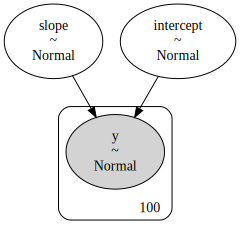

In [115]:
pm.model_to_graphviz(model)

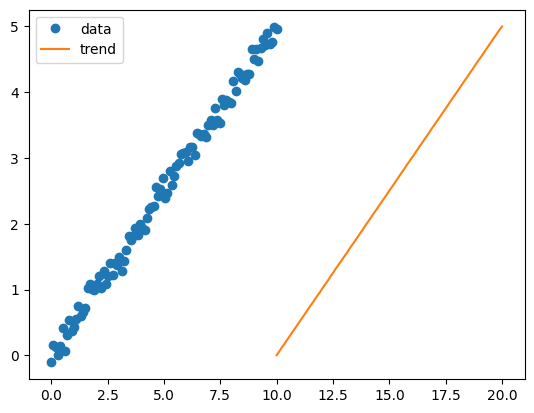

In [114]:
# predict future values
x_new = np.linspace(10, 20, n)
with model:
    y_new = pm.sample_posterior_predictive(trace, 
                                           var_names=['y'])

y_new_mean = az.extract(y_new.posterior_predictive).mean('sample')['y'].values
    
# plot the data and trend line
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='data')
plt.plot(x_new, y_new_mean, label='trend')
plt.legend()
plt.show()


In [111]:
az.extract(y_new.posterior_predictive).mean('sample')['y'].values

array([2.42987402e-03, 4.95570979e-02, 1.04146319e-01, 1.52209006e-01,
       2.02006192e-01, 2.54206040e-01, 3.04840038e-01, 3.53824430e-01,
       4.05836923e-01, 4.56889360e-01, 5.05982929e-01, 5.55924764e-01,
       6.09372336e-01, 6.62110503e-01, 7.08533887e-01, 7.58214829e-01,
       8.05532890e-01, 8.62415558e-01, 9.11807101e-01, 9.64835587e-01,
       1.00956716e+00, 1.06437143e+00, 1.11279215e+00, 1.16393778e+00,
       1.21597613e+00, 1.26392464e+00, 1.31731322e+00, 1.36675488e+00,
       1.41741279e+00, 1.46751199e+00, 1.51839292e+00, 1.56838023e+00,
       1.61911297e+00, 1.66965692e+00, 1.71975540e+00, 1.76907520e+00,
       1.82182077e+00, 1.87208129e+00, 1.92225943e+00, 1.97290650e+00,
       2.02330707e+00, 2.07476954e+00, 2.12656824e+00, 2.17313423e+00,
       2.22574473e+00, 2.27769506e+00, 2.32722051e+00, 2.37553076e+00,
       2.42893084e+00, 2.47743010e+00, 2.52923095e+00, 2.57952980e+00,
       2.62778865e+00, 2.68008089e+00, 2.72885443e+00, 2.78123304e+00,
      

In [169]:
import pymc as pm
import numpy as np

# create example time series data
n = 100
x = np.random.normal(size=n)
y = np.zeros(n)
y[0] = np.random.normal()
y[1] = np.random.normal()
for i in range(2, n):
    y[i] = 0.7 * y[i-1] - 0.1 * y[i-2] + 0.3 * x[i-1] + np.random.normal()

# create PyMC3 model
with pm.Model() as model:
    # define priors for parameters
    a = pm.Normal('a', mu=0, sigma=1)
    b = pm.Normal('b', mu=0, sigma=1)
    c = pm.Normal('c', mu=0, sigma=1)
    sigma = pm.HalfNormal('sigma', sigma=1)

    y1 = pm.MutableData(f'y_1', y[:-1])
    y = pm.MutableData(f'y', y[1:])
    x1 = pm.MutableData(f'x_1', x[:-1])

    # define regression model for time series
    mu = a + b*y1 + c*x1
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)

    # sample from posterior distribution
    trace = pm.sample(1000, chains=4)


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


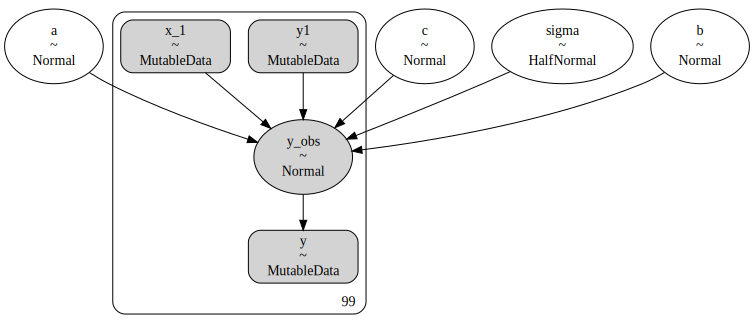

In [170]:
pm.model_to_graphviz(model)

In [176]:
vals = [1,2,5,7]

vals[:-2]

[1, 2]

In [177]:
import pandas as pd
import numpy as np

# set the start and end date
start_date = '2022-01-01'
end_date = '2022-12-31'

# create a date range using pandas
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# create a random time series data using numpy
data = np.random.rand(len(date_range))

# create a pandas dataframe
df = pd.DataFrame({'date': date_range, 'value': data})

# set the date column as the index
df.set_index('date', inplace=True)

# add a new column 'a' to the dataframe with random values
df['a'] = np.random.rand(len(date_range))

# print the first five rows of the dataframe
print(df.head())


               value         a
date                          
2022-01-01  0.045208  0.226874
2022-01-02  0.888722  0.272675
2022-01-03  0.634325  0.717245
2022-01-04  0.926626  0.451780
2022-01-05  0.630346  0.356746


In [26]:
import pandas as pd
import numpy as np

# set the start and end date
start_date = '2022-01-01'
end_date = '2022-12-31'

# create a date range using pandas
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# create a random set of categories
categories = ['category_{}'.format(i) for i in range(5)]

# create a dictionary to hold the time series data for each subcategory
data_dict = {}

# loop through each category and create 5 random time series data using numpy
for category in categories:
    for i in range(5):
        subcategory = 'sub_{}_{}'.format(category, i)
        data_dict[subcategory] = np.random.rand(len(date_range))

# create an empty list to hold the data for each subcategory
data_list = []

# loop through each category and subcategory and create a temporary dataframe with 'date', 'category', 'subcategory', and 'value' columns
for category in categories:
    for i in range(5):
        subcategory = 'sub_{}_{}'.format(category, i)
        data = data_dict[subcategory]
        temp_df = pd.DataFrame({'date': date_range, 'category': category, 'subcategory': subcategory, 'value': data, 'category_type': np.random.choice(['A', None,'B', 'C','D','E','F'],len(date_range))})
        data_list.append(temp_df)

# concatenate the list of dataframes into a single dataframe
df = pd.concat(data_list)

# add a new column 'a' to the dataframe with random values
df['a'] = np.random.rand(len(df.index))

# print the first five rows of the dataframe
print(df.head())


        date    category       subcategory     value category_type         a
0 2022-01-01  category_0  sub_category_0_0  0.391044             E  0.325770
1 2022-01-02  category_0  sub_category_0_0  0.847185             D  0.483612
2 2022-01-03  category_0  sub_category_0_0  0.920546          None  0.263558
3 2022-01-04  category_0  sub_category_0_0  0.169963             C  0.046612
4 2022-01-05  category_0  sub_category_0_0  0.205494             D  0.272321


In [20]:
df

,date,category,subcategory,value,category_type,a
0,2022-01-01,category_0,sub_category_0_0,0.712276,C,0.833652
1,2022-01-02,category_0,sub_category_0_0,0.972851,B,0.807990
2,2022-01-03,category_0,sub_category_0_0,0.715805,B,0.579549
3,2022-01-04,category_0,sub_category_0_0,0.266642,B,0.795782
4,2022-01-05,category_0,sub_category_0_0,0.288183,D,0.392404
...,...,...,...,...,...,...
360,2022-12-27,category_4,sub_category_4_4,0.589087,D,0.530173
361,2022-12-28,category_4,sub_category_4_4,0.292764,C,0.515237
362,2022-12-29,category_4,sub_category_4_4,0.927107,E,0.239424
363,2022-12-30,category_4,sub_category_4_4,0.108286,B,0.568761


In [29]:
df['category_type'].describe(include='all').to_frame()

,category_type
count,7800
unique,6
top,E
freq,1377


In [44]:
from pandas.api.types import is_numeric_dtype

col = 'category_type'
df_desc = df[col].describe().to_frame().reset_index()
if is_numeric_dtype(df[col]):
    df_desc[col]=df_desc[col].map("{:,.0f}".format)
df_desc

,index,category_type
0,count,7800
1,unique,6
2,top,E
3,freq,1377


True

In [32]:
df.describe(include='all')

/tmp/ipykernel_9916/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,date,category,subcategory,value,category_type,a
count,9125,9125,9125,9125.000000,7800,9125.000000
unique,365,5,25,NaN,6,NaN
top,2022-01-01 00:00:00,category_0,sub_category_0_0,NaN,E,NaN
freq,25,1825,365,NaN,1377,NaN
first,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2022-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.496614,NaN,0.500915
std,NaN,NaN,NaN,0.290115,NaN,0.289012
min,NaN,NaN,NaN,0.000060,NaN,0.000099
25%,NaN,NaN,NaN,0.242941,NaN,0.250654


In [3]:
import sys
sys.path.insert(0, "../tusha")

from identify_features import find_hierarchical_struct
from multivar_model_creation_time import shift_df_to_past

hierarchy_cols = find_hierarchical_struct(df,'date')

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/home/guyyos/miniconda3/envs/tusha-env/lib/python3.10/site-packages/pymc/sampling/jax.py:39: UserWarning: This module is experimental.
  warnings.warn("This module is experimental.")


In [8]:
num_past_steps = 3
df1,causes_past_map = shift_df_to_past(df,'date',['value','a'], hierarchy_cols,num_past_steps)

In [9]:

df1

,date,category,subcategory,subsubcategory,value,a,value[-1t],value[-2t],value[-3t],a[-1t],a[-2t],a[-3t]
3,2022-01-04,category_0,subcategory_category_0_0,subsubcat_category_0_0_0,0.745774,0.944791,0.858691,0.917663,0.247421,0.778301,0.248925,0.639844
4,2022-01-05,category_0,subcategory_category_0_0,subsubcat_category_0_0_0,0.071007,0.235796,0.745774,0.858691,0.917663,0.944791,0.778301,0.248925
5,2022-01-06,category_0,subcategory_category_0_0,subsubcat_category_0_0_0,0.232085,0.411177,0.071007,0.745774,0.858691,0.235796,0.944791,0.778301
6,2022-01-07,category_0,subcategory_category_0_0,subsubcat_category_0_0_0,0.443763,0.071615,0.232085,0.071007,0.745774,0.411177,0.235796,0.944791
7,2022-01-08,category_0,subcategory_category_0_0,subsubcat_category_0_0_0,0.498425,0.477895,0.443763,0.232085,0.071007,0.071615,0.411177,0.235796
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.163832,0.396508,0.826451,0.348161,0.829237,0.670751,0.769647,0.354510
361,2022-12-28,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.115476,0.345187,0.163832,0.826451,0.348161,0.396508,0.670751,0.769647
362,2022-12-29,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.520380,0.364210,0.115476,0.163832,0.826451,0.345187,0.396508,0.670751
363,2022-12-30,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.299122,0.775898,0.520380,0.115476,0.163832,0.364210,0.345187,0.396508


In [10]:
ss1 = 'subsubcat_category_4_4_2'
df[df['subsubcategory'] == ss1]



,date,category,subcategory,subsubcategory,value,a
0,2022-01-01,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.598643,0.011103
1,2022-01-02,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.508012,0.337372
2,2022-01-03,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.602223,0.726494
3,2022-01-04,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.172602,0.954412
4,2022-01-05,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.892408,0.182483
...,...,...,...,...,...,...
360,2022-12-27,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.163832,0.396508
361,2022-12-28,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.115476,0.345187
362,2022-12-29,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.520380,0.364210
363,2022-12-30,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.299122,0.775898


In [11]:
df1[df1['subsubcategory'] == ss1]


,date,category,subcategory,subsubcategory,value,a,value[-1t],value[-2t],value[-3t],a[-1t],a[-2t],a[-3t]
3,2022-01-04,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.172602,0.954412,0.602223,0.508012,0.598643,0.726494,0.337372,0.011103
4,2022-01-05,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.892408,0.182483,0.172602,0.602223,0.508012,0.954412,0.726494,0.337372
5,2022-01-06,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.216279,0.493382,0.892408,0.172602,0.602223,0.182483,0.954412,0.726494
6,2022-01-07,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.134228,0.594386,0.216279,0.892408,0.172602,0.493382,0.182483,0.954412
7,2022-01-08,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.157970,0.698174,0.134228,0.216279,0.892408,0.594386,0.493382,0.182483
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.163832,0.396508,0.826451,0.348161,0.829237,0.670751,0.769647,0.354510
361,2022-12-28,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.115476,0.345187,0.163832,0.826451,0.348161,0.396508,0.670751,0.769647
362,2022-12-29,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.520380,0.364210,0.115476,0.163832,0.826451,0.345187,0.396508,0.670751
363,2022-12-30,category_4,subcategory_category_4_4,subsubcat_category_4_4_2,0.299122,0.775898,0.520380,0.115476,0.163832,0.364210,0.345187,0.396508


In [13]:
causes_past = set([cp for cpi in causes_past_map.values() for cp in cpi.values()])
causes_past

{'a[-1t]', 'a[-2t]', 'a[-3t]', 'value[-1t]', 'value[-2t]', 'value[-3t]'}

In [16]:
causes_past_map['value'].values()

dict_values(['value[-1t]', 'value[-2t]', 'value[-3t]'])

In [14]:
relations_original = [('value','a')]

In [17]:
relations = [ (cp,effect) for (cause,effect) in relations_original for cp in causes_past_map[cause].values()]
relations

[('value[-1t]', 'a'), ('value[-2t]', 'a'), ('value[-3t]', 'a')]

In [18]:
relations_hierarchy = [(h1,h2) for (h1,h2) in zip(hierarchy_cols[:-1],hierarchy_cols[1:])]
relations_hierarchy

[('category', 'subcategory'), ('subcategory', 'subsubcategory')]

In [49]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = ['1970-01-01', '1970-01-01', '1970-02-01', '1970-04-01', '1970-01-02',
     '1972-01-31', '1970-02-13', '1971-04-19']

fig = make_subplots(rows=3, cols=2)

trace0 = go.Histogram(x=x)
trace1 = go.Histogram(x=x)
trace2 = go.Histogram(x=x, nbinsx=10)
trace3 = go.Histogram(x=x,
                      xbins=dict(
                      start='1969-11-15',
                      end='1972-03-31',
                      size='M18'), # M18 stands for 18 months
                      autobinx=False
                     )
trace4 = go.Histogram(x=x,
                      xbins=dict(
                      start='1969-11-15',
                      end='1972-03-31',
                      size='M4'), # 4 months bin size
                      autobinx=False
                      )
trace5 = go.Histogram(x=x,
                      xbins=dict(
                      start='1969-11-15',
                      end='1972-03-31',
                      size= 'M2'), # 2 months
                      autobinx = False
                      )

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.show()
